In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def random_run(T,k, v_max=0.01, start=None):
    X = np.zeros((T,k))
    v = np.random.randn(k)
    v = v/np.sqrt(np.sum(v**2.))*v_max
    a = np.zeros(k)

    X[0] = start if start is not None else 0.5*np.ones(k)



    for t in range(1,T):
        X[t] = X[t-1] + v
        for i in range(0,k):
            if X[t, i] >= 1. or  X[t, i] <= 0.:
                v[i] = - v[i]
                a[i] = - a[i]

            else:
                a = np.random.randn(k)*0.002

        a = np.clip(a, -0.002,0.002)
        v += a
        v = np.clip(v, -v_max,v_max)

        np.clip(X[t], 0., 1., X[t])
    return X


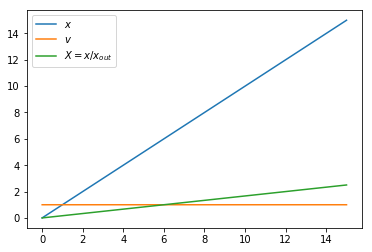

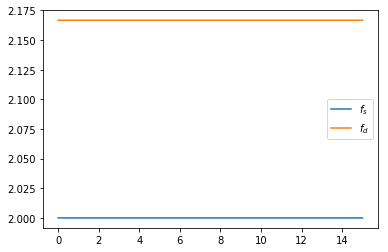

30.0


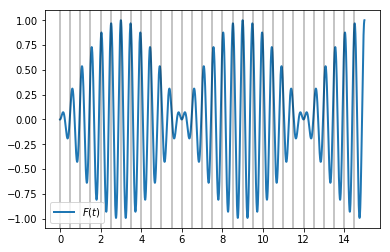

In [29]:

t0 = 0.
tL = 15.
L  = 5000
t  = np.linspace(t0,tL, num=L)
dt  = (tL - t0)/len(t)



def integrate(I):
    M = np.tril(np.ones((len(I), len(I))))
    return np.dot(M,I)






def phi(f, phi_zero=0.):
    return phi_zero + 2.*np.pi*integrate(f)*dt


def rate_(A1, phi1, A2, phi2):
    r = A1 * np.cos(phi1) + A2*np.cos(phi2)
    r = r/(A1 + A2)
    return r


def rate(A1, phi1, A2, phi2):
    r = A1*np.cos(phi1) + A2*np.cos(phi2)
    r = r/(A1 + A2)
    return r*np.maximum(r, 0)


x_out = 6.
k = 1/x_out 
# k = 1/2.
k_v = 1.

k_d = k/k_v

i_out = (2 + x_out)/(tL - t0)*L
i_out = int(i_out) 
i_in  = 2/(tL - t0)*L
i_in = int(i_in)




v = np.ones(L)*1.
x = integrate(v)*dt + t0
X = x/x_out


plt.plot(t,x, label="$x$")
plt.plot(t,v, label="$v$")
plt.plot(t,X, label="$X = x/x_{out}$")
plt.legend();
plt.show()


As = 1.
fs = np.ones(len(t))*2.


Ad = 1.
# fd = k*v*np.maximum(X,0)*np.maximum(1. - X,0) + fs
fd = k*v + fs


plt.plot(t,fs, label="$f_s$")
plt.plot(t,fd, label="$f_d$")
plt.legend();
plt.show()

phi_s = phi(fs, 0)
phi_d = phi(fd, np.pi)
# phi_d  = 2*np.pi*X + phi_s + np.pi 

# phi_d = phi_s + np.pi*2*0.7
# phi_d = phi_d%(2*np.pi)


r  = rate( As, phi_s, Ad, phi_d) 
r_ = rate_(As, phi_s, Ad, phi_d)  


# plt.xlim(0,2)
plt.plot(t,r_, label="$F(t)$", linewidth=2)
# plt.plot(t,np.cos(phi_s), label="soma", c="black", alpha=0.1, linestyle="-")

print fs[0]*tL
for i in range(int(fs[0]*tL)):
    plt.axvline(x=i/fs[0], c="black", alpha=0.3, linestyle="-")
plt.legend();
plt.show()


